<a href="https://www.kaggle.com/code/nahidsarkar/bitcoinpriceprediction?scriptVersionId=278026235" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [227]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cryptocurrencypricehistory/coin_ChainLink.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cardano.csv
/kaggle/input/cryptocurrencypricehistory/coin_Solana.csv
/kaggle/input/cryptocurrencypricehistory/coin_Dogecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Polkadot.csv
/kaggle/input/cryptocurrencypricehistory/coin_NEM.csv
/kaggle/input/cryptocurrencypricehistory/coin_XRP.csv
/kaggle/input/cryptocurrencypricehistory/coin_Ethereum.csv
/kaggle/input/cryptocurrencypricehistory/coin_Aave.csv
/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Cosmos.csv
/kaggle/input/cryptocurrencypricehistory/coin_Litecoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_Uniswap.csv
/kaggle/input/cryptocurrencypricehistory/coin_EOS.csv
/kaggle/input/cryptocurrencypricehistory/coin_BinanceCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_CryptocomCoin.csv
/kaggle/input/cryptocurrencypricehistory/coin_USDCoin.csv
/kaggle/input/c

In [228]:
bitcoin_df = pd.read_csv('/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv')

In [229]:
bitcoin_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [230]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [231]:
bitcoin_df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [232]:
bitcoin_df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


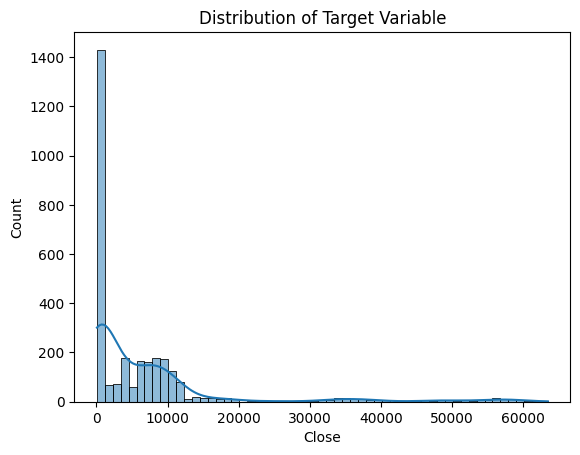

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=bitcoin_df, x='Close', kde=True)
plt.title('Distribution of Target Variable')
plt.show()

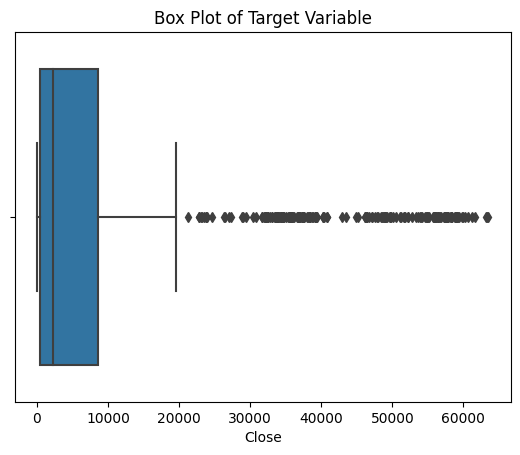

In [234]:
sns.boxplot(data=bitcoin_df, x='Close')
plt.title('Box Plot of Target Variable')
plt.show()

In [235]:
bitcoin_df.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [236]:
bitcoin_df.duplicated().sum()

0

In [237]:
bitcoin_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


--- Correlation Matrix (Text) ---
               High       Low      Open     Close    Volume  Marketcap
High       1.000000  0.998841  0.999442  0.999417  0.810464   0.999094
Low        0.998841  1.000000  0.998905  0.999291  0.803110   0.999072
Open       0.999442  0.998905  1.000000  0.998646  0.808439   0.998382
Close      0.999417  0.999291  0.998646  1.000000  0.807388   0.999709
Volume     0.810464  0.803110  0.808439  0.807388  1.000000   0.809156
Marketcap  0.999094  0.999072  0.998382  0.999709  0.809156   1.000000


Generating correlation heatmap...
Successfully saved heatmap as 'bitcoin_correlation_heatmap.png'


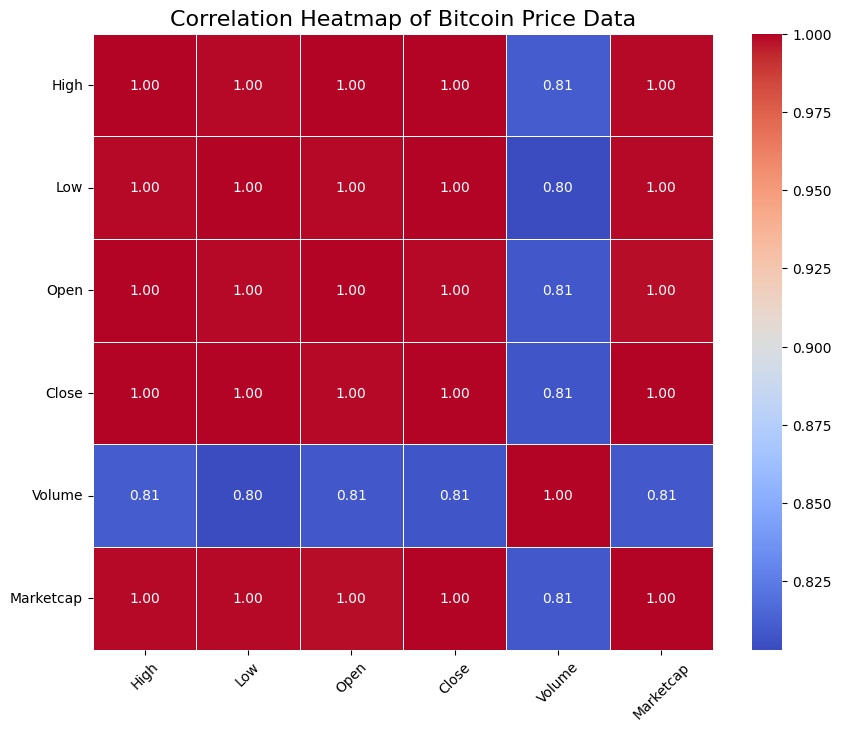

In [238]:
numeric_df = bitcoin_df.drop(columns=['SNo', 'Name', 'Symbol', 'Date'])

correlation_matrix = numeric_df.corr()

print("--- Correlation Matrix (Text) ---")
print(correlation_matrix)
print("\n")

print("Generating correlation heatmap...")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Bitcoin Price Data', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

heatmap_filename = 'bitcoin_correlation_heatmap.png'
plt.savefig(heatmap_filename)

print(f"Successfully saved heatmap as '{heatmap_filename}'")

In [239]:
bitcoin_df = bitcoin_df.drop(columns=['SNo', 'Name', 'Symbol'])

In [240]:
bitcoin_df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [241]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2991 non-null   object 
 1   High       2991 non-null   float64
 2   Low        2991 non-null   float64
 3   Open       2991 non-null   float64
 4   Close      2991 non-null   float64
 5   Volume     2991 non-null   float64
 6   Marketcap  2991 non-null   float64
dtypes: float64(6), object(1)
memory usage: 163.7+ KB


In [242]:
# Convert the column to datetime objects
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

print(bitcoin_df['Date'])

0      2013-04-29 23:59:59
1      2013-04-30 23:59:59
2      2013-05-01 23:59:59
3      2013-05-02 23:59:59
4      2013-05-03 23:59:59
               ...        
2986   2021-07-02 23:59:59
2987   2021-07-03 23:59:59
2988   2021-07-04 23:59:59
2989   2021-07-05 23:59:59
2990   2021-07-06 23:59:59
Name: Date, Length: 2991, dtype: datetime64[ns]


In [243]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2991 non-null   datetime64[ns]
 1   High       2991 non-null   float64       
 2   Low        2991 non-null   float64       
 3   Open       2991 non-null   float64       
 4   Close      2991 non-null   float64       
 5   Volume     2991 non-null   float64       
 6   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 163.7 KB


--- Skewness Scores ---
High         3.012925
Low          3.033504
Open         3.025191
Close        3.018634
Volume       3.742112
Marketcap    3.071752
dtype: float64

(A score > 1 or < -1 is considered highly skewed)

Generating histograms...
Histograms saved as 'feature_histograms.png'


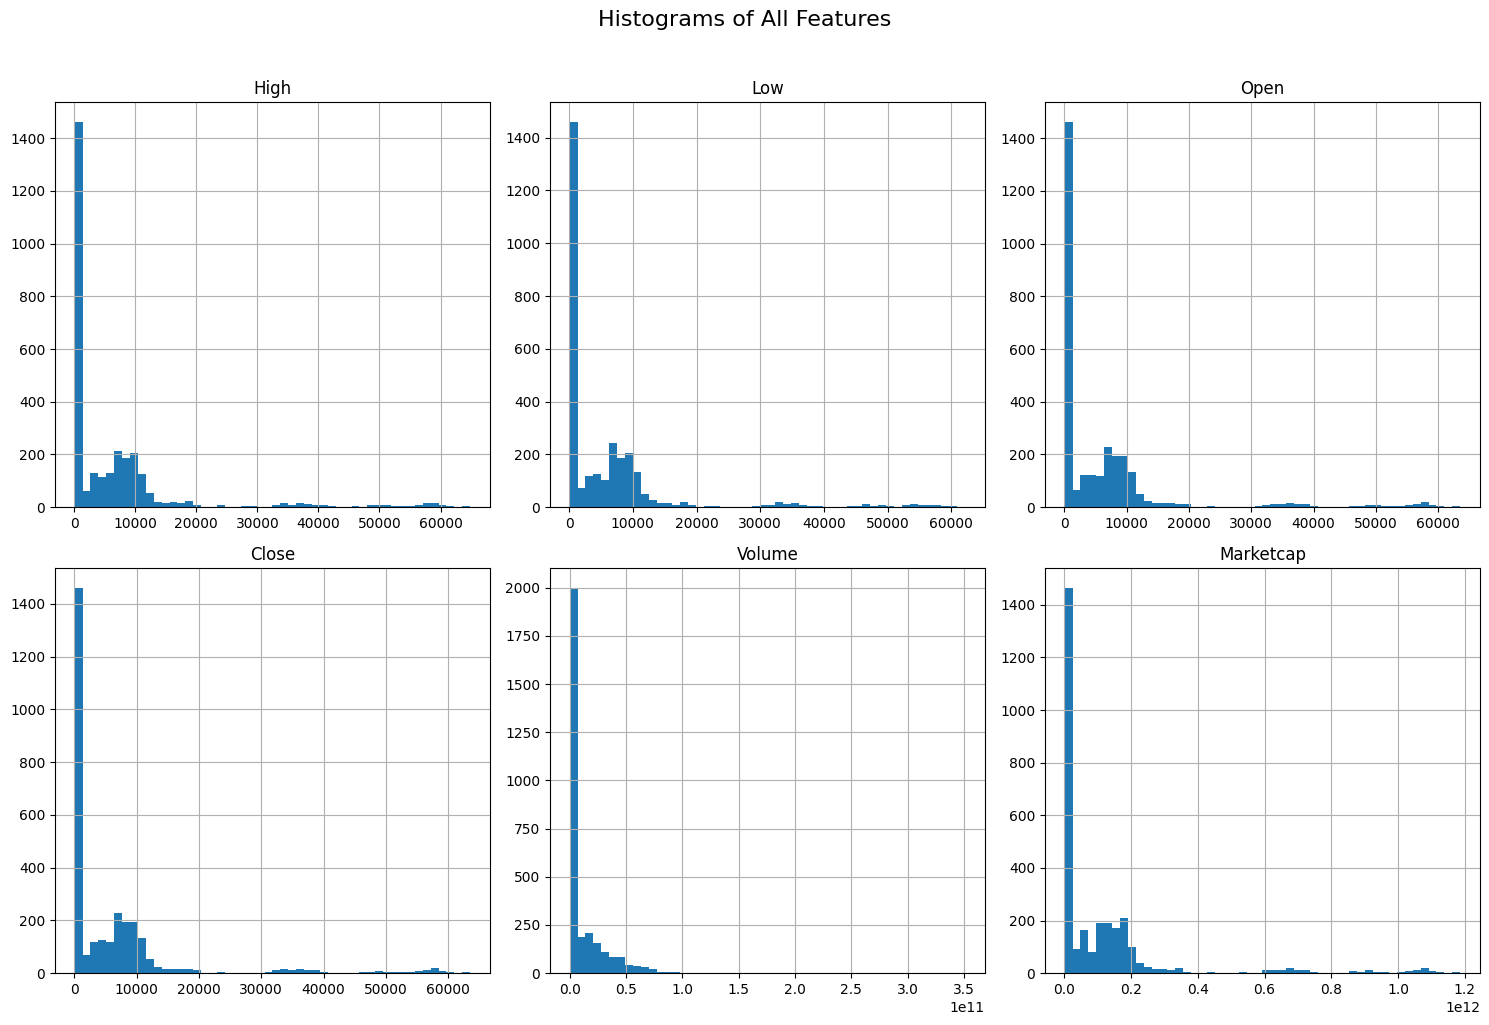

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

print("--- Skewness Scores ---")
skew_values = bitcoin_df[columns_to_check].skew()
print(skew_values)
print("\n(A score > 1 or < -1 is considered highly skewed)")


print("\nGenerating histograms...")
bitcoin_df[columns_to_check].hist(bins=50, figsize=(15, 10), layout=(2, 3))

plt.suptitle("Histograms of All Features", fontsize=16, y=1.02)
plt.tight_layout()

plt.savefig('feature_histograms.png')
print("Histograms saved as 'feature_histograms.png'")

Generating KDE plots...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

KDE plots saved as 'feature_kde_plots.png'


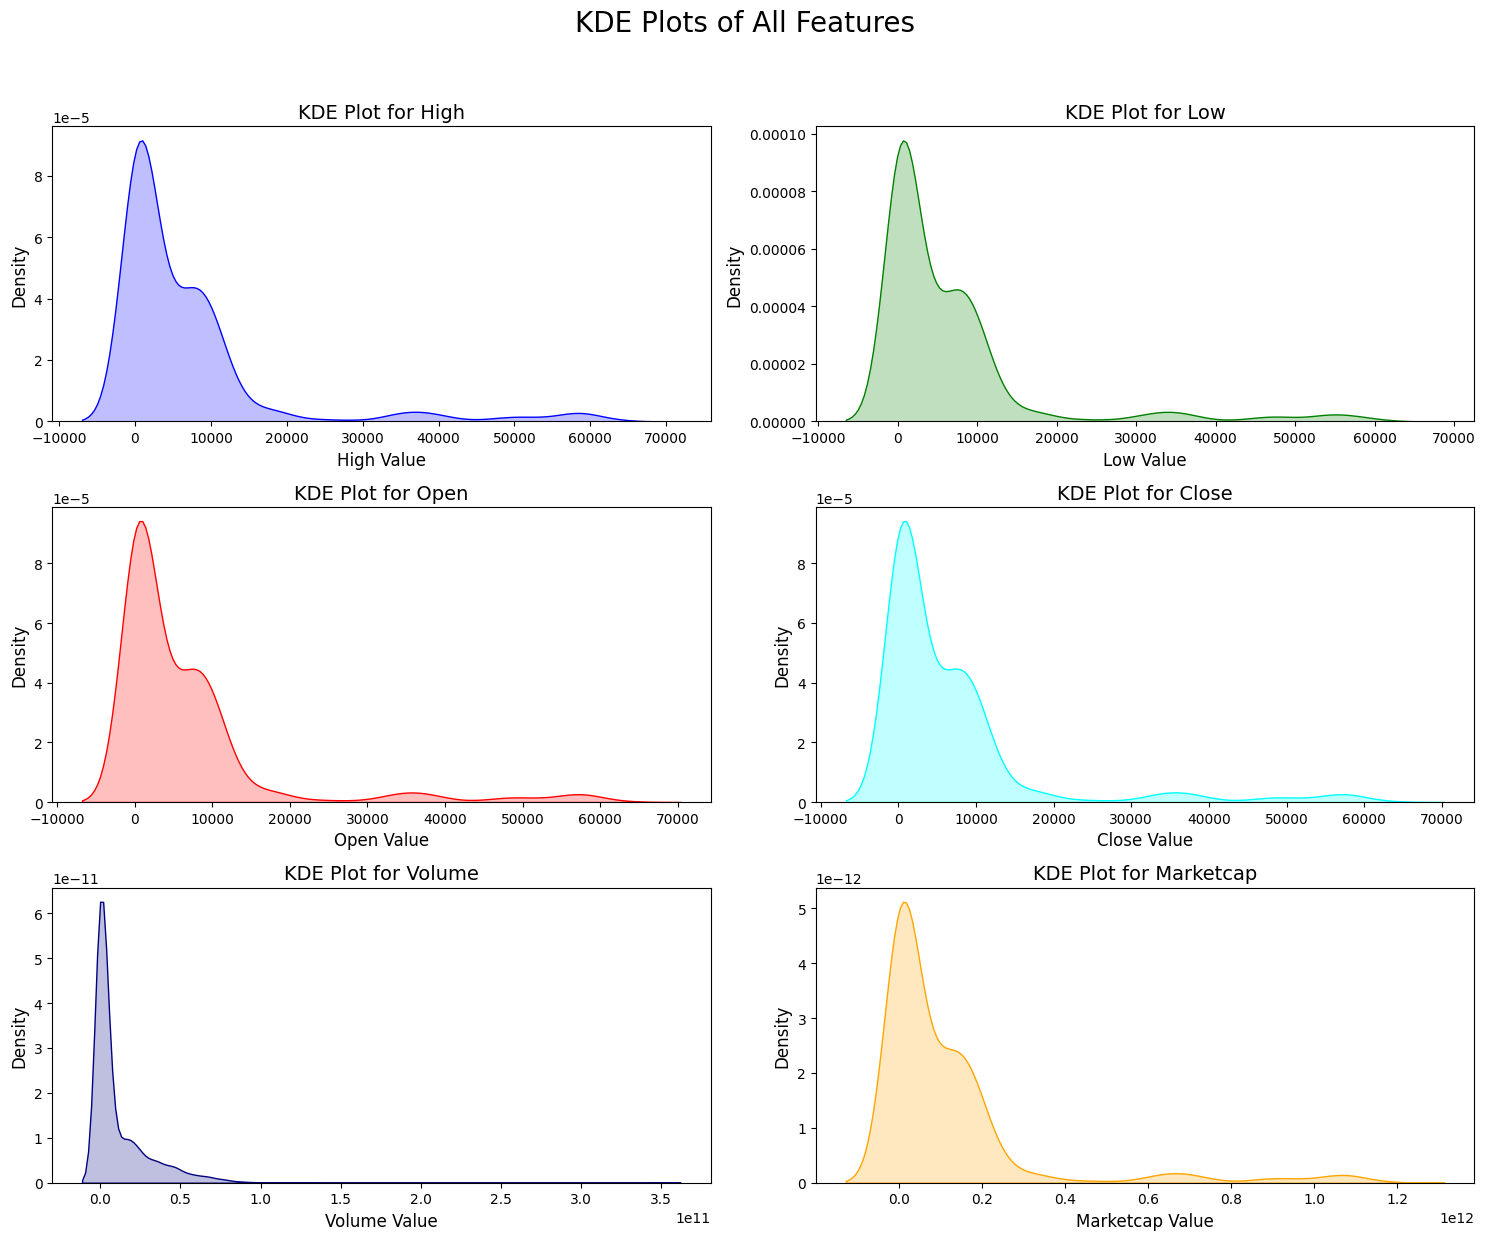

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assume 'bitcoin_df' is your loaded DataFrame ---

# 1. List of columns to check
columns_to_plot = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

colors = ['blue', 'green', 'red', 'cyan', 'navy', 'orange']

# 2. Create one figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# 3. Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

print("Generating KDE plots...")

# 4. Iterate and create a separate KDE plot for each column
for i, (column,color) in enumerate(zip(columns_to_plot,colors)):
    
    # Get the current axis (subplot)
    ax = axes[i]
    
    # Plot a KDE plot for the column on that axis
    # 'fill=True' creates the shaded area under the curve
    sns.kdeplot(bitcoin_df[column], ax=ax, fill=True, color=color)
    
    # Set the title and labels
    ax.set_title(f'KDE Plot for {column}', fontsize=14)
    ax.set_xlabel(f'{column} Value', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)

# 5. Add a main title for the whole figure
fig.suptitle("KDE Plots of All Features", fontsize=20, y=1.03)

# 6. Clean up the layout
plt.tight_layout()

# 7. Save the single figure
filename = 'feature_kde_plots.png'
plt.savefig(filename)

print(f"KDE plots saved as '{filename}'")

Generating box plots...
Box plots saved as 'feature_box_plots.png'


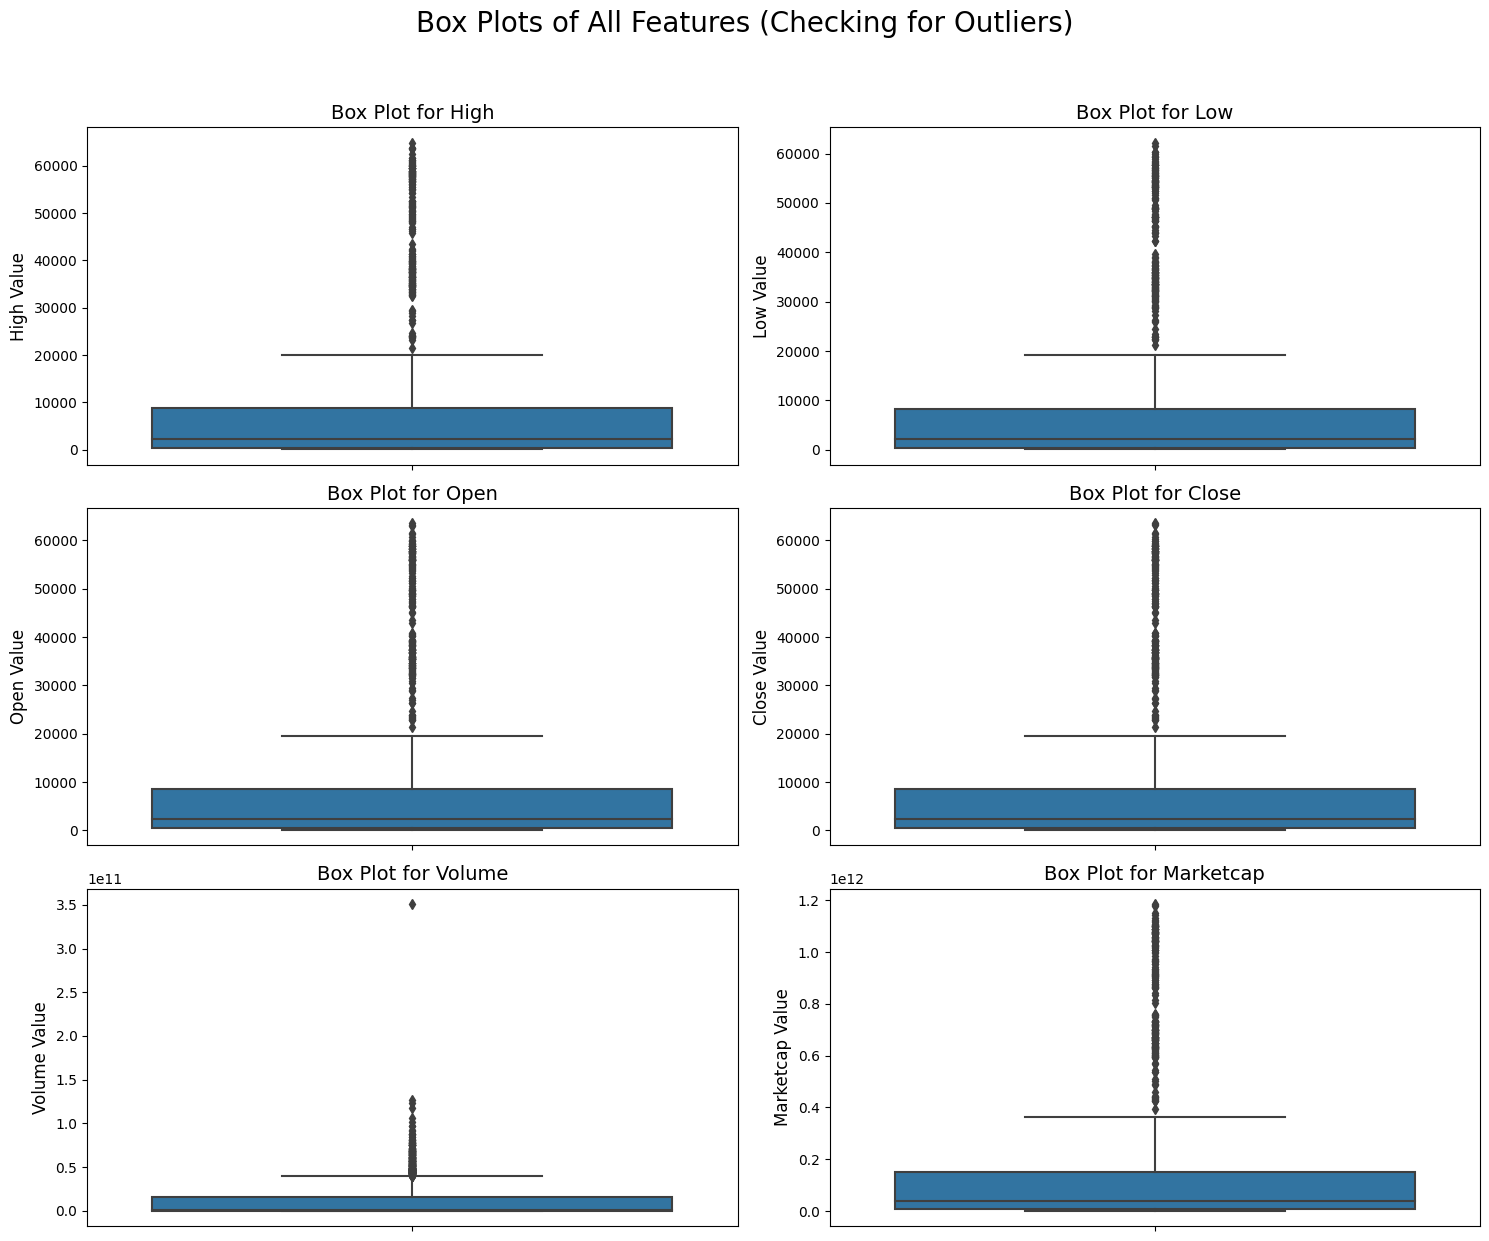

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assume 'bitcoin_df' is your loaded DataFrame ---

# 1. List of columns to check
columns_to_plot = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# 2. Create one figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# 3. Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

print("Generating box plots...")

# 4. Iterate and create a separate box plot for each column
for i, column in enumerate(columns_to_plot):
    
    # Get the current axis (subplot)
    ax = axes[i]
    
    # Plot a vertical box plot for the column
    sns.boxplot(y=bitcoin_df[column], ax=ax)
    
    # Set the title and labels
    ax.set_title(f'Box Plot for {column}', fontsize=14)
    ax.set_ylabel(f'{column} Value', fontsize=12)

# 5. Add a main title for the whole figure
fig.suptitle("Box Plots of All Features (Checking for Outliers)", fontsize=20, y=1.03)

# 6. Clean up the layout
plt.tight_layout()

# 7. Save the single figure
filename = 'feature_box_plots.png'
plt.savefig(filename)

print(f"Box plots saved as '{filename}'")

In [247]:
bitcoin_df = bitcoin_df.sort_values(by='Date')

X = bitcoin_df.drop(['Close', 'Date'], axis=1) 
y = bitcoin_df['Close']

test_size = 0.2

split_index = int(len(X) * (1 - test_size))

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Data split at: {X_train.index.max()} (Train) and {X_test.index.min()} (Test)")

X_train shape: (2392, 5)
X_test shape: (599, 5)
Data split at: 2391 (Train) and 2392 (Test)


In [248]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# --- Your existing split code ---
# (Assume X_train, X_test, y_train, y_test all exist)

# 1. Apply Log Transform (np.log1p)
# We apply it to train and test sets for both X and y

print("Applying log transform...")
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print("Log transform applied successfully.")
print("--- Skewness Scores (After Log Transform) ---")
print(X_train_log.skew())
print("\n(Skewness should now be close to 0)\n")

# 2. Apply Scaler (StandardScaler is ideal now)
# Now that the data is not skewed, StandardScaler is the best choice.

scaler = StandardScaler()

# Fit the scaler ONLY on the log-transformed training data
X_train_scaled = scaler.fit_transform(X_train_log)

# Transform the log-transformed test data
X_test_scaled = scaler.transform(X_test_log)

print("StandardScaler applied successfully.")

Applying log transform...
Log transform applied successfully.
--- Skewness Scores (After Log Transform) ---
High         0.229619
Low          0.218432
Open         0.225433
Volume      -1.921494
Marketcap    0.182170
dtype: float64

(Skewness should now be close to 0)

StandardScaler applied successfully.


In [249]:
# --- Create Scaler for y (This is the missing part) ---
scaler_y = StandardScaler()

# --- IMPORTANT: Reshape y to be a 2D array for the scaler ---
# We change y from (n_samples,) to (n_samples, 1)
y_train_log_2d = y_train_log.values.reshape(-1, 1)
y_test_log_2d = y_test_log.values.reshape(-1, 1)

# Fit the y-scaler ONLY on the log-transformed y_train
y_train_scaled = scaler_y.fit_transform(y_train_log_2d)

# Transform the log-transformed y_test
y_test_scaled = scaler_y.transform(y_test_log_2d)

print("StandardScaler applied to y successfully.")

StandardScaler applied to y successfully.


In [250]:
print("\n--- Final Shapes ---")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"y_train_scaled: {y_train_scaled.shape}")
print(f"X_test_scaled:  {X_test_scaled.shape}")
print(f"y_test_scaled:  {y_test_scaled.shape}")


--- Final Shapes ---
X_train_scaled: (2392, 5)
y_train_scaled: (2392, 1)
X_test_scaled:  (599, 5)
y_test_scaled:  (599, 1)


--- Skewness Scores (After Scaling) ---
High         0.229619
Low          0.218432
Open         0.225433
Volume      -1.921494
Marketcap    0.182170
dtype: float64

Generating histograms for SCALED data...
Histograms saved as 'scaled_feature_histograms.png'


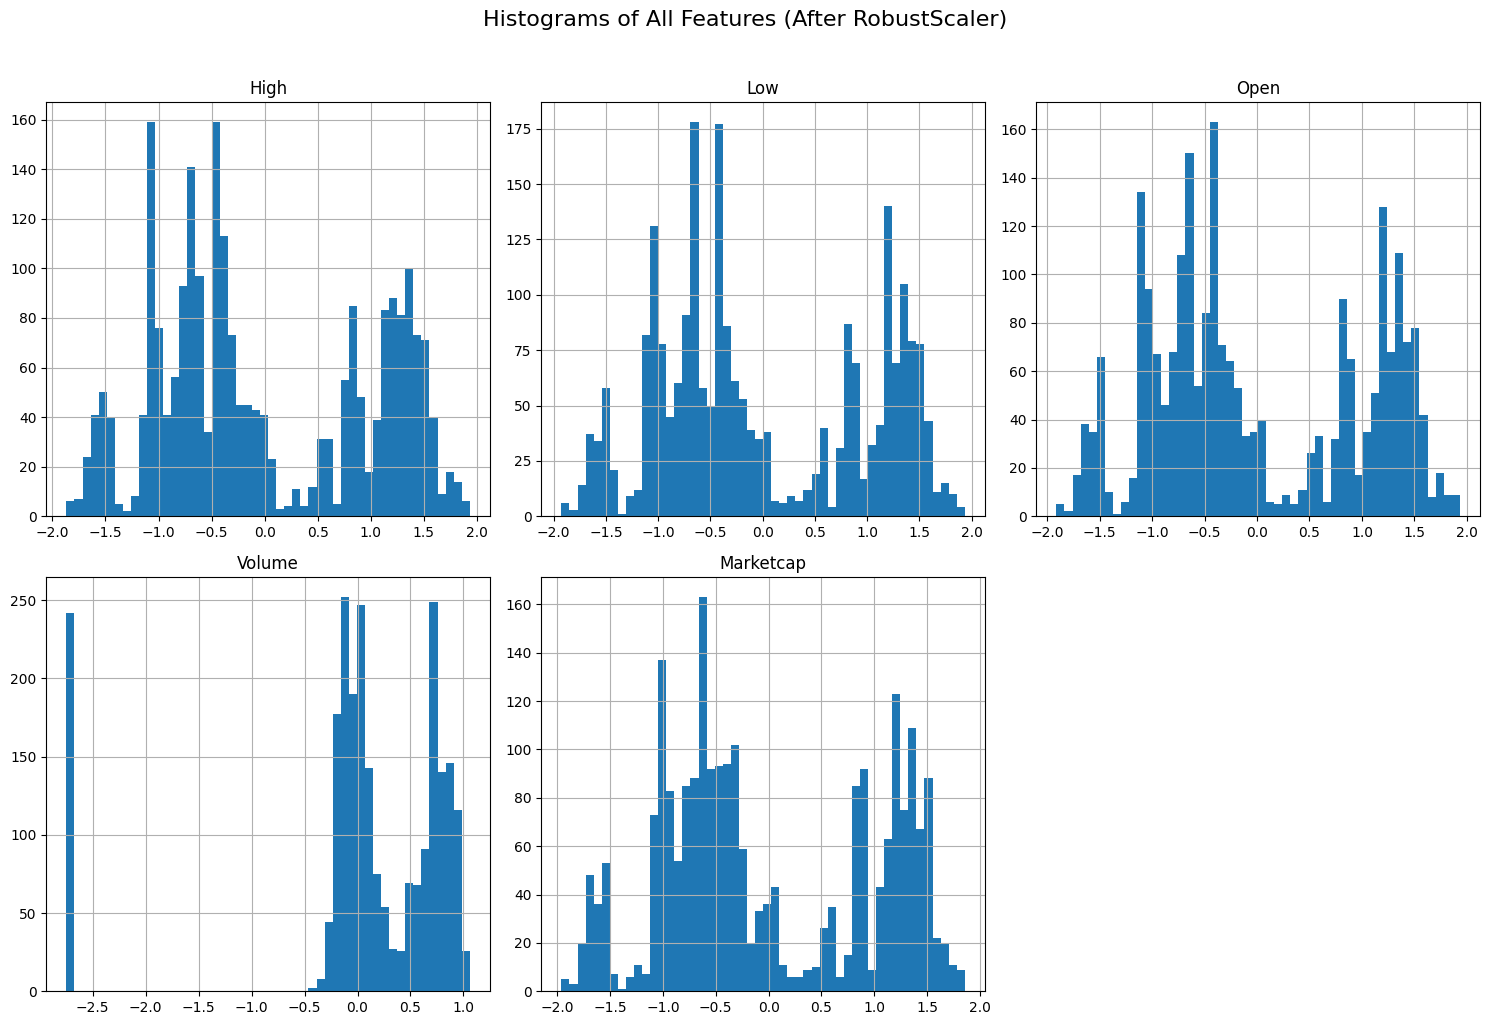

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Assumes 'X_train' (DataFrame) and 'X_train_scaled' (NumPy array) exist ---

# 1. Convert the scaled NumPy array back into a DataFrame
#    We use the columns from the original X_train
df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# 2. Get the list of columns to plot (all columns in the scaled DataFrame)
columns_to_check = df_scaled.columns

# 3. Check the skewness scores *after* scaling
print("--- Skewness Scores (After Scaling) ---")
skew_values = df_scaled[columns_to_check].skew()
print(skew_values)

# 4. Generate the histograms
print("\nGenerating histograms for SCALED data...")
df_scaled[columns_to_check].hist(bins=50, figsize=(15, 10), layout=(2, 3))

plt.suptitle("Histograms of All Features (After RobustScaler)", fontsize=16, y=1.02)
plt.tight_layout() # Prevents plots from overlapping

# Save the plot
plt.savefig('scaled_feature_histograms.png')
print("Histograms saved as 'scaled_feature_histograms.png'")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Target variable histograms saved as 'y_target_histograms.png'


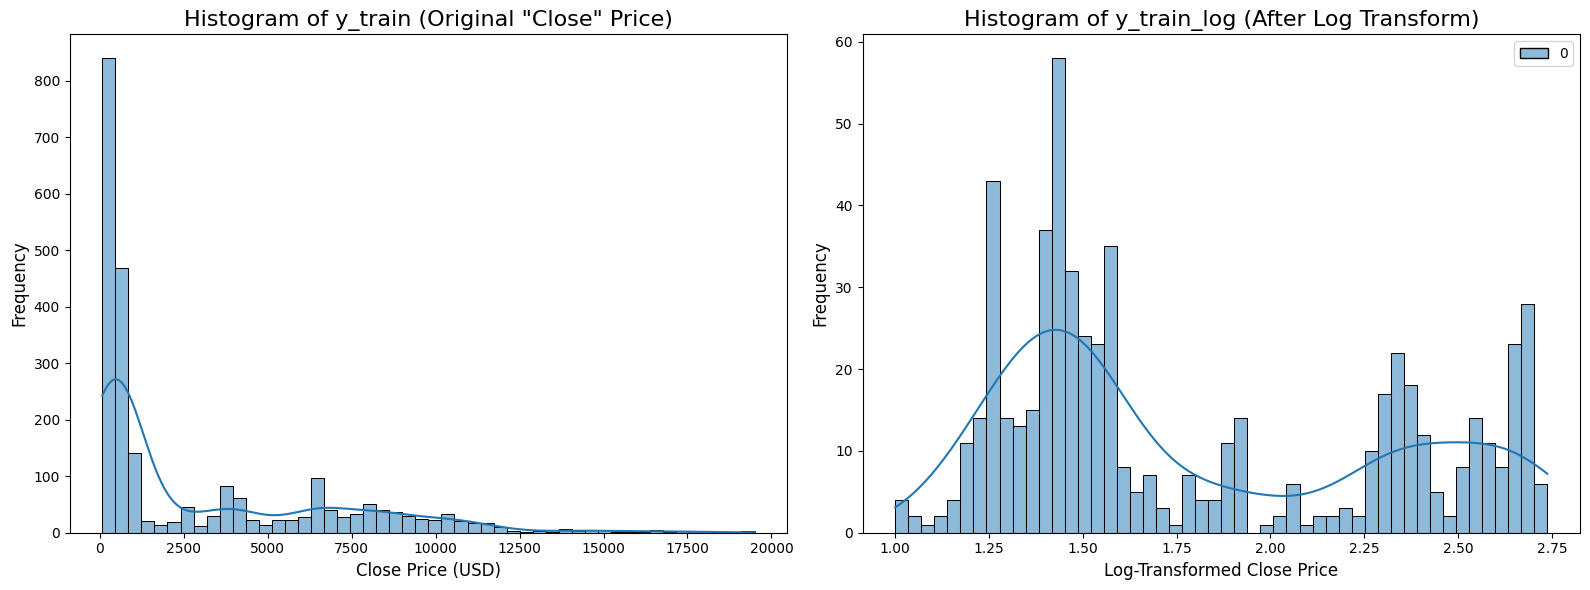

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assume 'y_train' and 'y_train_log' exist ---

# 1. Create one figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# --- Plot 1: Histogram of y_train (Original, Skewed) ---
sns.histplot(y_train, ax=axes[0], kde=True, bins=50)
axes[0].set_title('Histogram of y_train (Original "Close" Price)', fontsize=16)
axes[0].set_xlabel('Close Price (USD)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# --- Plot 2: Histogram of y_train_log (Log-Transformed) ---
sns.histplot(y_test_scaled, ax=axes[1], kde=True, bins=50, color='green')
axes[1].set_title('Histogram of y_train_log (After Scalling)', fontsize=16)
axes[1].set_xlabel('Log-Transformed Close Price', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# 2. Clean up the layout
plt.tight_layout()

# 3. Save the single figure
filename = 'y_target_histograms.png'
plt.savefig(filename)

print(f"Target variable histograms saved as '{filename}'")

Generating box plots for SCALED data...
Box plots saved as 'scaled_feature_box_plots.png'


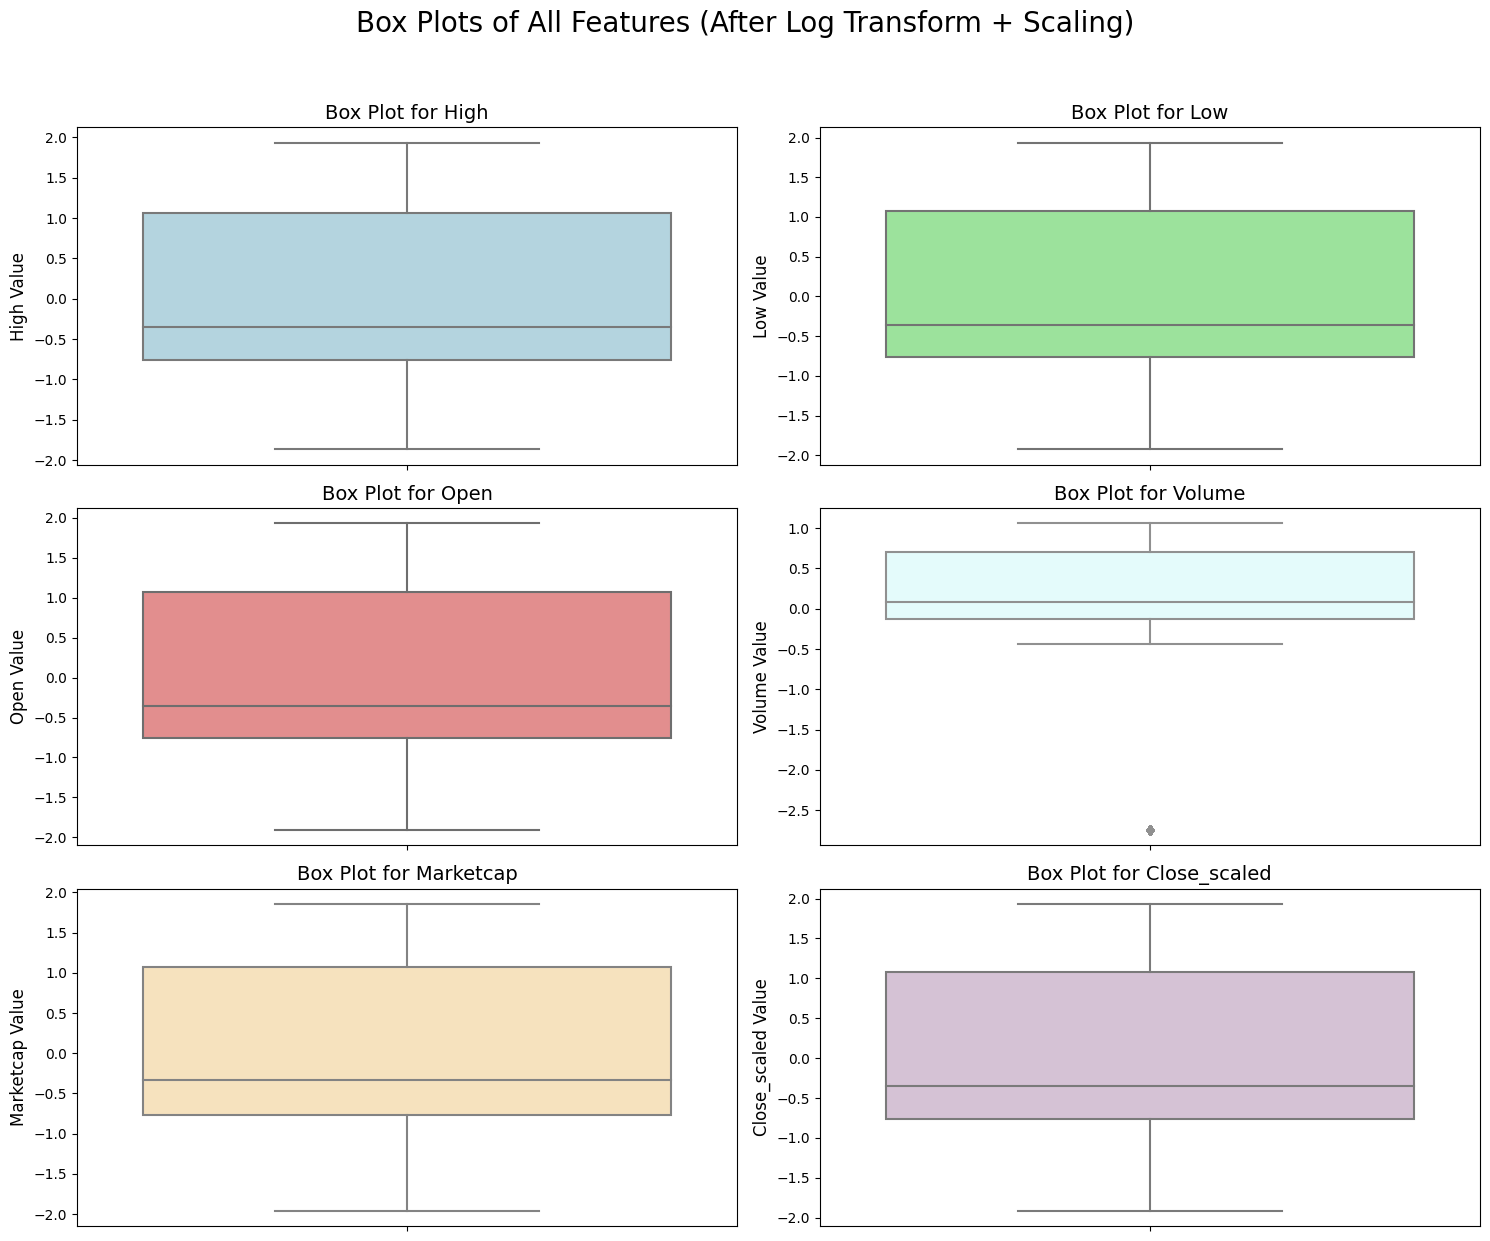

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assume these variables exist from your previous steps ---
# X_train: Your original training DataFrame (to get column names)
# X_train_scaled: The NumPy array from scaler_X.transform()
# y_train_scaled: The NumPy array from scaler_y.transform()

# 1. Convert X_train_scaled (array) back to a DataFrame
df_scaled_X = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# 2. Convert y_train_scaled (array) back to a DataFrame
# y_train_scaled is (n_samples, 1), so we just give it a column name
df_scaled_y = pd.DataFrame(y_train_scaled, columns=['Close_scaled'])

# 3. Combine them into one DataFrame for plotting
df_scaled = pd.concat([df_scaled_X, df_scaled_y], axis=1)

# 4. List of columns to check
columns_to_plot = df_scaled.columns

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightcyan', 'moccasin', 'thistle']

# 5. Create one figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# 6. Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

print("Generating box plots for SCALED data...")

# 7. Iterate and create a separate box plot for each column
for i, (column,color) in enumerate(zip(columns_to_plot,colors)):
    
    # Get the current axis (subplot)
    ax = axes[i]
    
    # Plot a vertical box plot for the column
    sns.boxplot(y=df_scaled[column], ax=ax, color = color)
    
    # Set the title and labels
    ax.set_title(f'Box Plot for {column}', fontsize=14)
    ax.set_ylabel(f'{column} Value', fontsize=12)

# 8. Add a main title for the whole figure
fig.suptitle("Box Plots of All Features (After Log Transform + Scaling)", fontsize=20, y=1.03)

# 9. Clean up the layout
plt.tight_layout()

# 10. Save the single figure
filename = 'scaled_feature_box_plots.png'
plt.savefig(filename)

print(f"Box plots saved as '{filename}'")